In [1]:
%load_ext autoreload
%autoreload 2
%load_ext Cython

from __future__ import division
from __future__ import print_function

import sys,time,datetime,copy,subprocess,itertools,pickle,warnings,json,gc,numbers

import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import Hawkes as hk

In [2]:
"""
para = {"mu":0.1, "alpha":0.5, "beta":10.0}
itv = [0,100000]
h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test1.txt',T)
"""

itv = [0,100000]
T = np.loadtxt('./Data/test1.txt')
h2 = hk.estimator().set_kernel('exp').set_baseline('const')
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

print("""--- expected output
{'beta': 10.047258972961286, 'alpha': 0.49292129697827947, 'mu': 0.10030016745850244}
-29044.498858665163""")

{'mu': 0.10030016745850244, 'beta': 10.047258972961286, 'alpha': 0.49292129697827947}
-29044.498858665163

--- expected output
{'beta': 10.047258972961286, 'alpha': 0.49292129697827947, 'mu': 0.10030016745850244}
-29044.498858665163


In [3]:
"""
para = {"mu":0.1, "alpha":[0.25,0.25], "beta":[1.0,20.0]}
itv = [0,100000]
h1 = hk.simulator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test2.txt',T)
"""

itv = [0,100000]
T = np.loadtxt('./Data/test2.txt')
h2 = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const')
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

print("""--- expected output
{'beta': array([ 1.01790975, 18.97190779]), 'alpha': array([0.24187727, 0.26452523]), 'mu': 0.1001459972416948}
-36930.924620952515""")

{'mu': 0.1001459972416948, 'beta': array([ 1.01790975, 18.97190779]), 'alpha': array([0.24187727, 0.26452523])}
-36930.924620952515

--- expected output
{'beta': array([ 1.01790975, 18.97190779]), 'alpha': array([0.24187727, 0.26452523]), 'mu': 0.1001459972416948}
-36930.924620952515


In [4]:
"""
para = {"mu":0.1, "k":0.5,"p":2.0,"c":1.0}
itv = [0,100000]
h1 = hk.simulator().set_kernel('pow').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test3.txt',T)
"""

itv = [0,100000]
T = np.loadtxt('./Data/test3.txt')
h2 = hk.estimator().set_kernel('pow').set_baseline('const')
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

print("""--- expected output
{'k': 0.4230587894571499, 'c': 0.9069624201390387, 'mu': 0.09977644580064245, 'p': 1.9191627398343252}
-47636.33600119316""")

{'mu': 0.09977644580064245, 'c': 0.9069624201390387, 'p': 1.9191627398343252, 'k': 0.4230587894571499}
-47636.33600119316

--- expected output
{'k': 0.4230587894571499, 'c': 0.9069624201390387, 'mu': 0.09977644580064245, 'p': 1.9191627398343252}
-47636.33600119316


{'mu': 0.10004106402901945, 'g': array([4.20583372e+00, 3.01334202e+00, 2.12058987e+00, 1.58550411e+00,
       1.18199924e+00, 7.09403570e-01, 5.46428221e-01, 4.06884408e-01,
       2.88923754e-01, 1.86585581e-01, 1.68185884e-01, 1.02551353e-01,
       8.21764474e-02, 4.20984708e-02, 7.07983271e-02, 4.71055973e-11,
       2.72391523e-02, 9.79757123e-13, 1.09438476e-12, 9.93327162e-03,
       1.12202464e-10, 1.65072421e-02, 1.07797623e-02, 4.01888269e-02,
       3.35863883e-12, 1.07240916e-09, 3.07930688e-13, 1.04307415e-08,
       6.47528600e-03, 4.50818482e-03])}
-29060.363864104987

--- expected output
{'mu': 0.10004106402901945, 'g': array([4.20583372e+00, 3.01334202e+00, 2.12058987e+00, 1.58550411e+00,
       1.18199924e+00, 7.09403570e-01, 5.46428221e-01, 4.06884408e-01,
       2.88923754e-01, 1.86585581e-01, 1.68185884e-01, 1.02551353e-01,
       8.21764474e-02, 4.20984708e-02, 7.07983271e-02, 4.71055973e-11,
       2.72391523e-02, 9.79757123e-13, 1.09438476e-12, 9.93327162e-03,


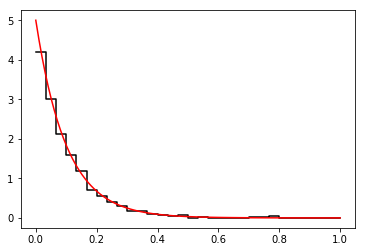

In [5]:
itv = [0,100000]
T = np.loadtxt('./Data/test1.txt')
h2 = hk.estimator().set_kernel('nonpara',support=1,num_bin=30).set_baseline('const')
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

print("""--- expected output
{'mu': 0.10004106402901945, 'g': array([4.20583372e+00, 3.01334202e+00, 2.12058987e+00, 1.58550411e+00,
       1.18199924e+00, 7.09403570e-01, 5.46428221e-01, 4.06884408e-01,
       2.88923754e-01, 1.86585581e-01, 1.68185884e-01, 1.02551353e-01,
       8.21764474e-02, 4.20984708e-02, 7.07983271e-02, 4.71055973e-11,
       2.72391523e-02, 9.79757123e-13, 1.09438476e-12, 9.93327162e-03,
       1.12202464e-10, 1.65072421e-02, 1.07797623e-02, 4.01888269e-02,
       3.35863883e-12, 1.07240916e-09, 3.07930688e-13, 1.04307415e-08,
       6.47528600e-03, 4.50818482e-03])}
-29060.363864104987""")

h2.kernel.plot()
plt.plot(np.linspace(0,1,100),0.5*10.0*np.exp(-10.0*np.linspace(0,1,100)),'r-')
pass

{'mu': array([11.21935684, 19.43368365, 15.67226006,  3.65182168,  1.13654055,
        9.46768351]), 'beta': 10.708538430327579, 'alpha': 0.1669911024212389}
2064.6714021508496

{'mu': array([ 3.28631065, -0.055172  ,  6.473691  , -1.32705964,  0.24983469,
       11.39206798]), 'beta': 10.368207251929265, 'alpha': 0.1609453831655844}
2066.3098757401394

--- expected output
{'beta': 10.708538430327579, 'alpha': 0.1669911024212389, 'mu': array([11.21935684, 19.43368365, 15.67226006,  3.65182168,  1.13654055,
        9.46768351])}
2064.6714021508496

{'beta': 10.368207251929265, 'alpha': 0.1609453831655844, 'mu': array([ 3.28631065, -0.055172  ,  6.473691  , -1.32705964,  0.24983469,
       11.39206798])}
2066.3098757401394


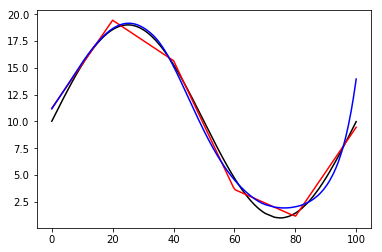

In [6]:
"""
para = {"alpha":0.2,"beta":10.0}
mu_t = lambda x: 10.0 + 9.0*np.sin(2*np.pi*x/100)
itv = [0,100]
h1 = hk.simulator().set_kernel("exp").set_baseline('custom',l_custom=mu_t).set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test4.txt',T)
"""

itv = [0,100]
T = np.loadtxt('./Data/test4.txt')

# piecewise lienar model
h2 = hk.estimator().set_kernel("exp").set_baseline('plinear',num_basis=6)
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

# log-linear model
h3 = hk.estimator().set_kernel("exp").set_baseline('loglinear',num_basis=6)
h3.fit(T,itv)
print(h3.para)
print(h3.L)
print()

print("""--- expected output
{'beta': 10.708538430327579, 'alpha': 0.1669911024212389, 'mu': array([11.21935684, 19.43368365, 15.67226006,  3.65182168,  1.13654055,
        9.46768351])}
2064.6714021508496

{'beta': 10.368207251929265, 'alpha': 0.1609453831655844, 'mu': array([ 3.28631065, -0.055172  ,  6.473691  , -1.32705964,  0.24983469,
       11.39206798])}
2066.3098757401394""")

mu_t = lambda x: 10.0 + 9.0*np.sin(2*np.pi*x/100)
plt.plot(T,mu_t(T),"k-")
plt.plot(T,h2.baseline.l(T),"r-")
plt.plot(T,h3.baseline.l(T),"b-")
pass